In [1]:
import numpy as np
from glob import glob
import cv2
import os

import ipywidgets as widgets
from ipywidgets import Layout, Box, Label

import matplotlib.pyplot as plt
%matplotlib inline

## Main requirements:
- annotating the images of cars in two classes: "good" and "bad"(details in the notebook)
- ability to save car ids of different classes into separate files
- ability to continue annotating from the last image after reloading the notebook

In [2]:
def display_img_widget(path):
    with open(path, 'rb') as f:
        image_widget.value = f.read()
        image_widget.width = 400
        image_widget.height = 400

        
def on_button_click(b):
    global good_ids, cur_index
    cur_id = not_annotated[cur_index].split('/')[-1].split('.')[0]
    
    if b.description == 'Good':
        good_ids.append(cur_id)
    elif b.description == 'Bad':
        bad_ids.append(cur_id)
    else:
        return
    cur_index += 1
    
    if cur_index == len(paths):
        print('End of collection')
        return 
    display_img_widget(not_annotated[cur_index])
    
    
def save_txt(arr, fname):
    with open(fname, 'w') as f:
        for l in arr:
            f.write(l + '\n')
            
            
def load_txt(fname):
    if os.path.exists(fname):
        with open(fname, 'r') as f:
            return [l.strip() for l in f.readlines()]
    else:
        return []

    
def on_save_click(b):
    save_txt(good_ids, good_ids_path)
    save_txt(bad_ids, bad_ids_path)

    
def check_is_part_in_list(part, l):
    return sum([x in part for x in l])

## Loading data

In [3]:
data_folder = '/mnt/md0/shared/cars/data/flickr/stance_car/*'

good_ids = []
bad_ids = []

paths = sorted(glob(data_folder), reverse=True)
cur_index = 0

good_ids_path = '/mnt/md0/shared/cars/data/flickr/good_ids.txt'
bad_ids_path = '/mnt/md0/shared/cars/data/flickr/bad_ids.txt'

good_ids = load_txt(good_ids_path)
bad_ids = load_txt(bad_ids_path)

all_ids = good_ids.copy()
all_ids.extend(bad_ids)
not_annotated = [path for path in paths if check_is_part_in_list(path, all_ids) < 1]

print('Annotated: {}, left: {}, total: {}'.format(len(all_ids), len(not_annotated),
                                                  len(paths)))

Annotated: 3458, left: 3905, total: 7363


## Widgets

In [4]:
good_button = widgets.Button(description='Good', button_style='primary')
good_button.on_click(on_button_click)

bad_button = widgets.Button(description='Bad', button_style='danger')
bad_button.on_click(on_button_click)

save_button = widgets.Button(description='Save', button_style='info')
save_button.on_click(on_save_click)

image_widget = widgets.Image(width=400, height=400)
with open(not_annotated[0], 'rb') as f:
    image_widget.value = f.read()

In [5]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([image_widget, good_button, bad_button, save_button], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch',
    width='100%'
))

In [6]:
form

Box(children=(Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\x…

### Image of the form, in case of a rendering failure on the page
<img src='form.png'>

## Rules of annotation:
Bad if:
- the car isn't fully visible
- open hood or door
- there is no single main object
- vertical photo(or another bad ratio)
- photo in the room
- smoke, rain
- unusual perspective
- too many people

In [7]:
len(good_ids), len(bad_ids)

(886, 2572)

In [8]:
cur_index

0

## Helpers

### For removing all annotations

In [9]:
# os.remove(good_ids_path)
# os.remove(bad_ids_path)

### For removing one last annotation(in case of mistake)

In [10]:
# good_ids = good_ids[:-1]

## Good examples

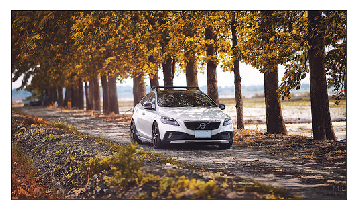

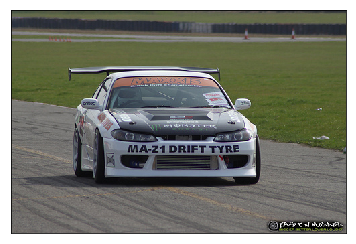

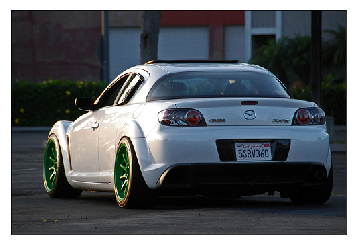

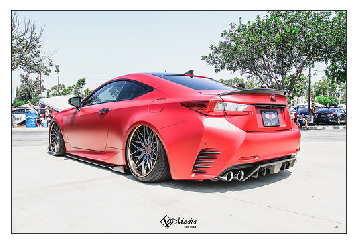

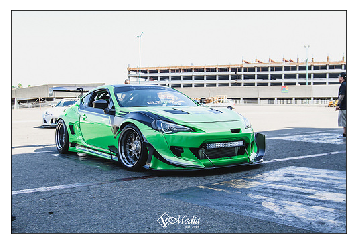

In [11]:
path_format = '/mnt/md0/shared/cars/data/flickr/stance_car/{}.jpg'

for good in np.random.choice(good_ids, 5):
    path = path_format.format(good)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.imread(path)[:,:,::-1])
    plt.xticks([])
    plt.yticks([])

## Bad examples

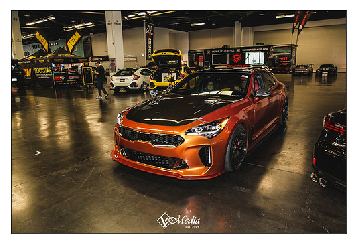

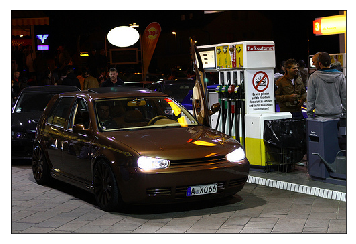

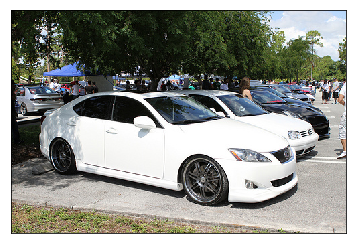

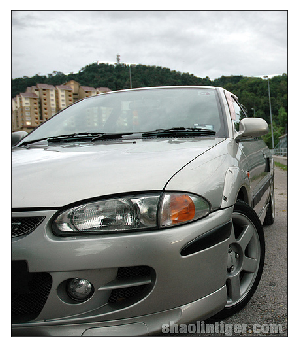

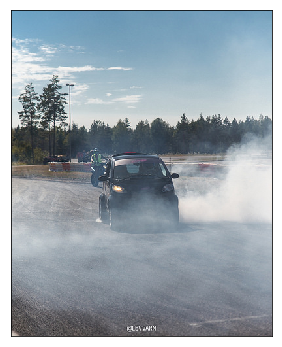

In [12]:
for bad in np.random.choice(bad_ids, 5):
    path = path_format.format(bad)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.imread(path)[:,:,::-1])
    plt.xticks([])
    plt.yticks([])